In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from functools import reduce
from scipy.optimize import curve_fit

# Tests

## average value of function

We compute the average value of $f(x)=x^{2}$ on the interval 0 to 4.  This is given by $\int_{0}^{n} dx\, \frac{x^{2}}{n}=\frac{n^{2}}{3}$.

In [2]:
n=5

In [3]:
# f(x)=x**2
def x_squared(x):
    return x**2

In [4]:
# sample 10**5 points uniformly in the range 0 to 4 and append to my vals_array
vals_array = np.empty(0)
for _ in range(10**5):
    num = n*np.random.rand(1)
    vals_array = np.append(vals_array, x_squared(num))

In [5]:
# average value of vals_array is approximately 16/3 = 5.333; uncertainty is standard deviation
# print central_val - 1 std, central_val, central_val + 1 std
mean_val = vals_array.mean()
std_val = vals_array.std()/np.sqrt(len(vals_array))
print(mean_val-std_val, mean_val, mean_val+std_val)

8.340051411312576 8.363646457377984 8.387241503443391


In [6]:
# exact answer
(n**2)/3

8.333333333333334

## $\mathbb{Z}_{n}$ approximation of $U(1)$

We compute the average value of the group element $e^{i\phi}$ in the interval where it is nearer the identity element than to any other element of $\mathbb{Z}_{n}$.  This is given by $\int_{-\pi/n}^{\pi/n}d\phi\, \frac{e^{i\phi}}{2\pi/n} = \frac{n}{\pi}\sin{\frac{\pi}{n}}$

In [7]:
n=27

In [8]:
def xi_r(phi):
    return np.exp(1j*phi)

In [9]:
# sample 10**5 points uniformly in the range 0 to 4 and append to my vals_array
vals_array = np.empty(0)
for _ in range(10**5):
    phi = (2*np.pi/n)*np.random.rand(1)-(np.pi/n)
    vals_array = np.append(vals_array, xi_r(phi))

In [10]:
vals_array.mean()

np.complex128(0.9977467749921451+0.00017291042658048426j)

In [11]:
(n/np.pi)*np.sin(np.pi/n)

np.float64(0.9977451016125587)

# Sample S(1080)

In [12]:
s_1080 = np.load('S_1080_final.npy')
s_1080 = [np.matrix(item) for item in s_1080]

In [13]:
nearest_neighbors = []

for item in s_1080[:-1]:
    if np.real(((item-np.identity(3)).H @ (item-np.identity(3))).trace()) < 2.8:
        nearest_neighbors.append(item)

In [14]:
def generate_el_su3():#theta1, theta2, theta3, phi1, phi2, phi3, phi4, phi5):
    # if in_list is not None:
    #     theta1, theta2, theta3, phi1, phi2, phi3, phi4, phi5 = in_list
    # else:
    theta1, theta2, theta3 = (np.pi/2)*np.random.rand(3)
    phi1, phi2, phi3, phi4, phi5 = 2*np.pi*np.random.rand(5)
    return np.matrix([[np.exp(1j*phi1)*np.cos(theta1)*np.cos(theta2),\
                      np.exp(1j*phi3)*np.sin(theta1),\
                      np.exp(1j*phi4)*np.cos(theta1)*np.sin(theta2)],\
                     [-np.exp(1j*(phi1+phi2-phi3))*np.cos(theta2)*np.cos(theta3)*np.sin(theta1) + np.exp(-1j*(phi4+phi5))*np.sin(theta2)*np.sin(theta3),\
                      np.exp(1j*phi2)*np.cos(theta1)*np.cos(theta3),\
                      -np.exp(1j*(phi2-phi3+phi4))*np.cos(theta3)*np.sin(theta1)*np.sin(theta2) - np.exp(-1j*(phi1+phi5))*np.cos(theta2)*np.sin(theta3)],\
                     [-np.exp(-1j*(phi2+phi4))*np.cos(theta3)*np.sin(theta2) - np.exp(1j*(phi1-phi3+phi5))*np.cos(theta2)*np.sin(theta1)*np.sin(theta3),\
                      np.exp(1j*phi5)*np.cos(theta1)*np.sin(theta3),\
                      np.exp(-1j*(phi1+phi2))*np.cos(theta2)*np.cos(theta3) - np.exp(-1j*(phi3-phi4-phi5))*np.sin(theta1)*np.sin(theta2)*np.sin(theta3)]])

In [15]:
def is_closer(elem):
    closer = True
    dist = np.real(elem.trace())
    for neighbor in nearest_neighbors:
        if np.real((neighbor@elem).trace()) > dist:
            closer = False
            break
    return closer

In [16]:
vals_array = np.empty(0)
for _ in range(1000000):
    elem = generate_el_su3()
    if is_closer(elem):
        vals_array = np.append(vals_array, np.real(elem.trace()))

In [17]:
vals_array.mean()/3

np.float64(0.8505043918495123)

In [18]:
vals_array.std()/3/np.sqrt(len(vals_array))

np.float64(0.0011150732044503942)

# Sample $\mathbb{BI}$

In [19]:
bicos = np.load('binary_icosahedral_final.npy')
bicos = [np.matrix(item) for item in bicos]

In [20]:
nearest_neighbors = []

for item in bicos[:-1]:
    if np.real(((item-np.identity(2)).H @ (item-np.identity(2))).trace()) < 2.8:
        nearest_neighbors.append(item)

In [6]:
def generate_el_su2():
    theta1 = (np.pi/2)*np.random.rand()
    phi1, phi2 = 2*np.pi*np.random.rand(2)
    return np.matrix([[np.exp(1j*phi1)*np.cos(theta1),\
                      -np.exp(-1j*phi2)*np.sin(theta1)],\
                     [np.exp(1j*phi2)*np.sin(theta1),\
                      np.exp(-1j*phi1)*np.cos(theta1)]])

In [22]:
def is_closer(elem):
    closer = True
    dist = np.real(elem.trace())
    for neighbor in nearest_neighbors:
        if np.real((neighbor@elem).trace()) > dist:
            closer = False
            break
    return closer

In [23]:
vals_array = np.empty(0)
for _ in range(1000000):
    elem = generate_el_su2()
    if is_closer(elem):
        vals_array = np.append(vals_array, np.real(elem.trace()))

In [24]:
vals_array.mean()/2

np.float64(0.971084937306189)

In [25]:
vals_array.std()/2/np.sqrt(len(vals_array))

np.float64(0.00012544662301593388)

# Clifford + T

In [2]:
H = (2**-(1/2))*np.matrix([[1, 1], [1, -1]])
S = np.matrix([[1, 0], [0, 1j]])

X = np.matrix([[0, 1], [1, 0]])
Y = 1j*np.matrix([[0, -1], [1, 0]])
Z = np.matrix([[1, 0], [0, -1]])

T = np.matrix([[1, 0], [0, np.exp(1j*np.pi/4)]])

In [3]:
def generate_el_su2():
    theta1 = (np.pi/2)*np.random.rand()
    phi1, phi2 = 2*np.pi*np.random.rand(2)
    return np.matrix([[np.exp(1j*phi1)*np.cos(theta1),\
                      -np.exp(-1j*phi2)*np.sin(theta1)],\
                     [np.exp(1j*phi2)*np.sin(theta1),\
                      np.exp(-1j*phi1)*np.cos(theta1)]])

In [4]:
def min_distance(group_elem, others):
    min_dist = 10**9
    for item in others:
        new_distance = np.real(4-(item.H@group_elem + group_elem.H @ item).trace())[0,0]
        #print(new_distance)
        if min_dist > new_distance:
            min_dist = new_distance
    return min_dist

In [5]:
A = [np.matrix(np.identity(2)), H, S, H@S, S@H, H@S@H]
B = [np.matrix(np.identity(2)), X, Y, Z]

clifford_group = [item[0]@item[1] for item in [*product(*[A, B])]]

In [6]:
def make_word(group, T, length):
    mat_list = [[group, [T]][i%2] for i in range(2*length+1)]
    word_iter = product(*mat_list)
    for item in word_iter:
        yield reduce(lambda x, y: x@y, item, np.identity(2))

In [7]:
# num_mats = 1
# word_length=4
# points = np.zeros((num_mats, word_length))
# np.random.seed(1)
# for i in range(num_mats):
#     my_mat = X@T@Y@T@X@T@Z
#     for j in range(word_length):
#         my_thing=make_word(clifford_group, [T], j)
#         points[i,j]=min_distance(my_mat, my_thing)

In [8]:
# points

In [9]:
# num_mats = 10
# word_length=3
# points = np.zeros((num_mats, word_length))
# np.random.seed(1)
# for i in range(num_mats):
#     my_mat = generate_el_su2()
#     for j in range(word_length):
#         my_thing=make_word(clifford_group, [T], j)
#         points[i,j]=min_distance(my_mat, my_thing)

In [10]:
def get_points(word_length, T_mat, num_mats=1):
    points = np.zeros((num_mats, word_length))
    for i in range(num_mats):
        my_mat = generate_el_su2()
        for j in range(word_length):
            my_thing=make_word(clifford_group, [T_mat], j)
            points[i,j]=min_distance(my_mat, my_thing)
    return points

In [11]:
def gen_T():
    return np.matrix([[1, 0], [0, np.exp(2*np.pi*1j*np.random.rand())]])

In [12]:
my_points = get_points(3, gen_T(), 10)

In [26]:
my_points

array([[1.29155173, 0.19345349, 0.26079321],
       [1.64490266, 0.36576169, 0.29847854],
       [0.8681317 , 0.24577573, 0.30770839],
       [1.72964741, 0.65832066, 0.27388753],
       [1.27674943, 0.2773387 , 0.28036849],
       [2.54286446, 0.51078349, 0.25685731],
       [2.03973277, 0.27086594, 0.30639658],
       [1.42060546, 0.26136092, 0.26846607],
       [0.14277408, 0.10407154, 0.2426916 ],
       [1.18266546, 0.17325997, 0.24505172]])

In [13]:
processed_points=[[min(item[:i+1]) for i in range(len(item))] for item in my_points]

In [14]:
processed_array=np.array(processed_points)

In [15]:
[processed_array[:,i].mean() for i in range(processed_array.shape[-1])]

[np.float64(1.4139625173102797),
 np.float64(0.30609921311777716),
 np.float64(0.23553496701894933)]

In [16]:
def fit_func(x, A, B):
    return np.exp(A*x+B)

In [17]:
np.random.randint(1024**2)

959336

In [18]:
def gen_random(word_length, num_mats=1):
    T_mat = gen_T()
    return T_mat

In [19]:
gen_random(1)

matrix([[1.       +0.j       , 0.       +0.j       ],
        [0.       +0.j       , 0.7409064-0.6716083j]])

In [20]:
def get_slope(word_length, num_mats = 2):
    T_mat = T#gen_T()
    processed_points = [[min(item[:i+1]) for i in range(len(item))] for item in get_points(word_length, T_mat, num_mats)]
    processed_array=np.array(processed_points)
    fit_input_avg = np.array([processed_array[:,i].mean() for i in range(processed_array.shape[-1])])
    fit_input_std = np.array([processed_array[:,i].std() for i in range(processed_array.shape[-1])])
    params, _ = curve_fit(fit_func, [*range(len(fit_input_avg))], fit_input_avg, sigma=fit_input_std)
    return (params[0], T_mat)

In [21]:
T_mat = gen_T()
process_points = [[min(item[:i+1]) for i in range(len(item))] for item in get_points(2, T_mat, 2)]
processed_array=np.array(processed_points)
fit_input = np.array([processed_array[:,i].mean() for i in range(processed_array.shape[-1])])

In [30]:
get_slope(2)

/tmp/ipykernel_9749/2060973108.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(fit_func, [*range(len(fit_input_avg))], fit_input_avg, sigma=fit_input_std)


(np.float64(-1.1903499351960423),
 matrix([[1.        +0.j        , 0.        +0.j        ],
         [0.        +0.j        , 0.70710678+0.70710678j]]))

In [433]:
T

matrix([[1.        +0.j        , 0.        +0.j        ],
        [0.        +0.j        , 0.70710678+0.70710678j]])

In [84]:
get_slope(3, num_mats=5)

matrix([[ 1.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        , -0.47917749-0.87771803j]])

In [68]:
params, _ = curve_fit(fit_func, [*range(3)], [processed_array[:,i].mean() for i in range(processed_array.shape[-1])],\
sigma=[processed_array[:,i].std() for i in range(processed_array.shape[-1])])

In [75]:
params

array([-1.24488437,  0.33876821])

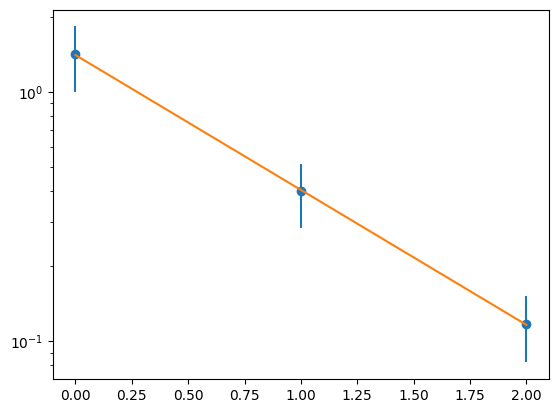

In [78]:
length = processed_array.shape[-1]

plt.scatter([*range(length)], [processed_array[:,i].mean() for i in range(length)])
plt.errorbar([*range(length)], [processed_array[:,i].mean() for i in range(length)], [processed_array[:,i].std() for i in range(length)], ls='none')
plt.plot([*range(length)], [fit_func(i, *params) for i in range(length)])
plt.yscale('log')
plt.show()